## In this notebook an implementation of linear regression model in PyTorch is presented.

In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

### Step 0: Prepare dataset

In [2]:
X_numpy, y_numpy = datasets.make_regression(n_samples = 100, n_features=1, noise=20, random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape

### Step 1: Model design - input size, output size, forward pass

In [3]:
input_size = n_features
output_size = 1

model = nn.Linear(input_size, output_size)

### Step 2: Construct loss and optimizer

In [4]:
learning_rate = 0.01
loss_fcn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

### Step 3: Training loop:
- forward pass: compute prediction and loss
- backward pass: compute gradients
- update weights

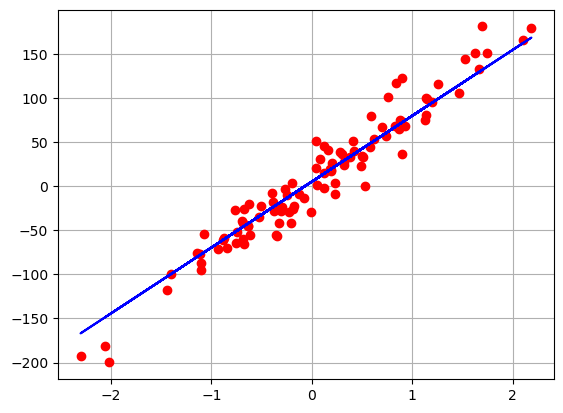

In [5]:
epochs = 150

for epoch in range(epochs):
    # forward pass and loss computation
    y_predicted = model(X)
    loss = loss_fcn(y_predicted, y)
    
    # backward pass
    loss.backward()
    
    # update
    optimizer.step()
    
    # zero gradients
    optimizer.zero_grad()
    
    if (epoch+1 % 15) == 0:
        print(f"epoch: {epoch+1}, loss={loss.item():.8f}")
        
# plot the results

predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.grid()
plt.show()